In [2]:
%env AWS_NO_SIGN_REQUEST=YES

env: AWS_NO_SIGN_REQUEST=YES


# 读取影像
`raster-vision`基于`GDAL`对矢量、影像进行处理，所以`GDAL`支持的数据格式，理论上`raster-vision`也支持，并且`raster-vision`还扩展了对`S3`的支持。
1. [GDAL支持的遥感影像列表](https://gdal.org/en/stable/drivers/raster/index.html)
2. [GDAL支持的矢量格式列表](https://gdal.org/en/stable/drivers/vector/index.html)
   
`RasterioSource`是`raster-vision`的遥感影像IO的一个核心类，它提供了读取、写入、裁剪、重采样等操作。

1. 从S3加载

In [1]:
from rastervision.core.data import RasterioSource

img_uri = 's3://azavea-research-public-data/raster-vision/examples/spacenet/RGB-PanSharpen_AOI_2_Vegas_img205.tif'
raster_source = RasterioSource(img_uri, allow_streaming=True)
raster_source.shape

/opt/conda/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


RasterioIOError: AWS_SECRET_ACCESS_KEY and AWS_NO_SIGN_REQUEST configuration options not defined, and /root/.aws/credentials not filled

2. 从本地加载

In [ ]:
from rastervision.core.data import RasterioSource

file_uri = "data/RGB-PanSharpen_AOI_2_Vegas_img205.tif"
raster_source = RasterioSource(file_uri, allow_streaming=True)
raster_source.shape


/opt/conda/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


(650, 650, 3)

# 影像处理
`raster-vision`提供了一系列的影像处理算子`Transformer`，同时`RasterioSource`还支持像`numpy`一样直接进行切片。
1. MinMaxTransforme
2. StatsTransformer
3. CastTransformer
4. NanTransformer
在构造`RasterioSource`的时候，就可以传递一个`Transformer`，`RasterioSource`在我们获取数据的时候会自动应用`Transformer`。  

接下来，我们先看看`RasterioSource`的切片操作。

1. 影像裁剪,裁剪一个 400x400 的影像

In [2]:
chip = raster_source[:400, :400]
chip.shape

(400, 400, 3)

2. 归一化。为了渲染图片，需要将波段值到0-255或者0-1之间。  

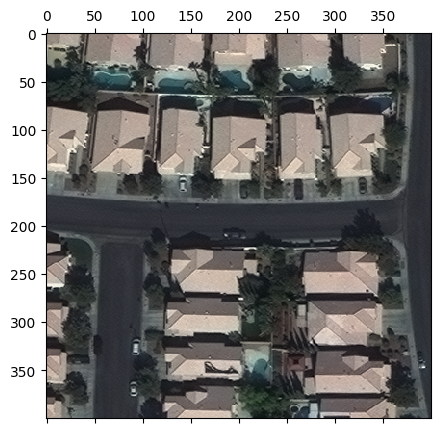

In [3]:
from matplotlib import pyplot as plt

colors_mins = chip.reshape(-1, chip.shape[-1]).min(axis=0)
colors_maxs = chip.reshape(-1, chip.shape[-1]).max(axis=0)
chip_normalized = (chip - colors_mins) / (colors_maxs - colors_mins)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(chip_normalized)
plt.show()

影像降采样，提取指定波段
1. 可以直接像Numpy切片一样进行降采样
2. 降采样到原图像的1/4，提取第2个波段

chip shape: (100, 100, 1)


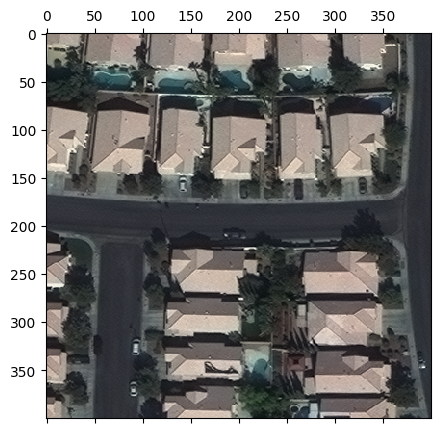

In [4]:
chip = raster_source[:400:4, :400:4, [1]]
print('chip shape:', chip.shape)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(chip_normalized)
plt.show()

影像操作算子

get_chip  
1. raster-vision提供了get_chip函数可以直接对影像进行缩放、裁剪等操作

In [5]:
chip = raster_source.get_chip(window=Box(xmin=0, ymin=0, xmax=400, ymax=400),
                       out_shape=(100, 100),
                       bands=[1])
chip.shape

NameError: name 'Box' is not defined

MinMaxTransformer  
1. raster-vision 提供了 `MinMaxTransformer`算子可以方便的进行归一化
2. `MinMaxTransformer` 是直接应用在`RasterSource`上的

In [ ]:
from rastervision.core.data import MinMaxTransformer
MinMaxTransformer().transform(raster_source)

AttributeError: 'RasterioSource' object has no attribute 'reshape'